In [2]:
import iris 
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import numpy as np


%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
data_dir = 'QBO_volc_2023_data/'
data_dir1 = '/shared//netscratch/lrm49/UKCA_VN112_QBO_SIMS/PERTLIM_CONTROLS/'

In [31]:

JAN_W = iris.load(data_dir+'Jan_wQBO_control.nc')
JNW1 = iris.load(data_dir+'Jan_wQBO_control_1.nc')
JNW2 = iris.load(data_dir+'Jan_wQBO_control_2.nc')
a = iris.load(data_dir+'Jan_wQBO_60Tg.nc')


JUL_E= iris.load(data_dir+'July_eQBO_control.nc')
JLE1 = iris.load(data_dir+'July_eQBO_control_1.nc')
JLE2 = iris.load(data_dir+'July_eQBO_control_2.nc')
j = iris.load(data_dir+'July_eQBO_60Tg.nc')


JUL_W = iris.load(data_dir+'July_wQBO_control.nc')
JLW1 = iris.load(data_dir+'July_wQBO_control_1.nc')
JLW2 = iris.load(data_dir+'July_wQBO_control_2.nc')
d = iris.load(data_dir+'July_wQBO_60Tg.nc')


JAN_E = iris.load(data_dir+'Jan_eQBO_control.nc')
JNE1 = iris.load(data_dir+'Jan_eQBO_control_1.nc')
JNE2 = iris.load(data_dir+'Jan_eQBO_control_2.nc')
g = iris.load(data_dir+'Jan_eQBO_60Tg.nc')

In [32]:
master_list = [a,d,g,j]

In [33]:
control_list = [JAN_W, JNW1, JNW2, JUL_W,JLW1, JLW2,  JAN_E, JNE1, JNE2,  JUL_E, JLE1, JLE2]

### Calculate T  averaged over longitude

In [34]:
control_list

[[<iris 'Cube' of SO2 / (kg kg-1) (time: 36; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of air_mass / (kg) (time: 36; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SAOD at 550 nm / (1) (time: 36; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 36; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of air_pressure / (Pa) (time: 36; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of air_temperature / (K) (time: 36; pressure: 17; latitude: 145; longitude: 192)>,
 <iris 'Cube' of air_temperature / (K) (time: 36; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of surface_altitude / (m) (latitude: 144; longitude: 192)>,
 <iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 36; latitude: 144; longitude: 192)>,
 <iris 'Cube' of toa_outgoing_shortwave_flux / (W m-2) (time: 36; latitude: 144; longitude: 192)>,
 <iris 'Cube' of upward_air_

In [35]:
list_t = []
for cube in master_list:
    x = cube[6]
    list_t.append(x)

In [36]:
list_tc = []
for i, cube in enumerate(control_list):
    if i%3 ==0:
        x = cube[6]
    else:
        x = cube[6]
    list_tc.append(x)

In [37]:
t_average = []
for eruption in list_t:
    lon_average = eruption[0:12].collapsed( 'longitude', iris.analysis.MEAN,)
    t_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_altitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1186: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  factory.update(old_coord, new_coord)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: C

In [38]:
tc_average = []
for eruption in list_tc:
    lon_average = eruption[0:12].collapsed( 'longitude', iris.analysis.MEAN)
    tc_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_altitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1186: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  factory.update(old_coord, new_coord)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: C

### repeat for zonal wind

In [39]:
zonal_list = []
for cube in master_list:
    x = cube[12]
    zonal_list.append(x)

In [40]:
zon_average = []
for eruption in zonal_list:
    lon_average = eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,)
    zon_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [41]:
zonal_c_list = []
for i, cube in enumerate(control_list):
    if i%3 ==0:
        x = cube[11]
    else:
        x = cube[12]
    zonal_c_list.append(x)

In [42]:
zonc_average = []
for control in zonal_c_list:
    lon_average = control[0:12].collapsed( ['longitude'], iris.analysis.MEAN,)
    zonc_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: User

### repeat for w wind

In [43]:
data_dir = 'QBO_volc_2023_data/'

In [44]:
b = iris.load(data_dir+'July_60Tg_wQBO_momentum.nc')
a = iris.load(data_dir+'Jan_60Tg_wQBO_momentum.nc')
c = iris.load(data_dir+'Jan_60Tg_eQBO_momentum.nc')
d = iris.load(data_dir+'July_60Tg_eQBO_momentum.nc')

In [45]:
cont = iris.load(data_dir+'control_momentum.nc')

In [72]:
wbarstar = [a[4],  b[4], c[4], d[4]]
wbarstar_cont = [cont[4][63:63+33],  cont[4][21:21+33], cont[4][3:3+33], cont[4][45:45+33]]

In [73]:
w_average = []
for eruption in wbarstar:
    lon_average = eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,)
    w_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [74]:
wc_average = []
for eruption in wbarstar_cont:
    lon_average = eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,)
    wc_average.append(lon_average)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


## Find control ensemble averages

In [49]:
tc_avg = [sum(tc_average[i:i+3])/3 for i in range(0,12,3)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord

In [50]:
zonc_avg = [sum(zonc_average[i:i+3])/3 for i in range(0,12,3)]

### Calculate anomalies

In [51]:
tc_avg

[<iris 'Cube' of unknown / (K) (time: 12; model_level_number: 85; latitude: 144)>,
 <iris 'Cube' of unknown / (K) (time: 12; model_level_number: 85; latitude: 144)>,
 <iris 'Cube' of unknown / (K) (time: 12; model_level_number: 85; latitude: 144)>,
 <iris 'Cube' of unknown / (K) (time: 12; model_level_number: 85; latitude: 144)>]

In [52]:
t_anomalies = []
for i in range(0,4):
        anomaly = t_average[i] - tc_avg[i]
        t_anomalies.append(anomaly)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord_or_factory.make_coord(self.coord_dims)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1443: UserWarning: Orography coordinate has bounds. These are being disregarded.
  coord = coord

In [53]:
zon_anomalies = []
for i in range(0,4):
        anomaly = zon_average[i] - zonc_avg[i]
        zon_anomalies.append(anomaly)

In [75]:
w_anomalies = []
for i in range(0,4):
        anomaly = w_average[i] - wc_average[i]
        w_anomalies.append(anomaly)

## Load SO4

In [55]:
SO4_list = [] #select SO4
for cube in master_list:
    SO4 = cube[3]
    SO4_list.append(SO4[0:35])

In [56]:
SO4_list_c = []
for i, cube in enumerate(control_list):
    if i % 3 == 0:
        SO4 = cube[3]
    else:
        SO4 = cube[3]
    SO4_list_c.append(SO4[0:35])

In [57]:
SO4_list_c

[<iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1) (time: 35; model_level_number: 85; latitude: 144; longitude: 192)>,
 <iris 'Cube' of SO4_total / (kg kg-1

In [58]:

SO4_avg = [sum(SO4_list_c[i:i+3])/3 for i in range(0, 12,3)] #group into 3s and find mean

In [59]:
SO4_anomalies = [] #subtract correct anomaly
for i in range(0, 4):
        anomaly = SO4_list[i] - SO4_avg[i]
        SO4_anomalies.append(anomaly)

In [60]:
SO4_avs = [eruption[0:12].collapsed(['longitude'], iris.analysis.MEAN) for eruption in SO4_anomalies]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_altitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1186: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  factory.update(old_coord, new_coord)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: C

#### interpolate onto pressure levels

In [61]:
pressures = master_list[0][4]
press_avs = pressures[0:12].collapsed(['time','longitude'], iris.analysis.MEAN)

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_altitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\cube.py:1186: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  factory.update(old_coord, new_coord)


In [62]:
grid_y_alt = press_avs.data.ravel()/100

In [63]:
grid_x_alt = np.tile(press_avs.coord('latitude').points, (85))

In [64]:
grid_y_1 = np.tile(zon_average[0].coord('pressure').points, (145,1))
grid_y = np.transpose(grid_y_1)
grid_x = np.tile(zon_average[0].coord('latitude').points, (36,1))

In [65]:
from scipy.interpolate import griddata

In [66]:
SO4_alt = []
for array in SO4_avs:
    SO4_time = []
    for i in range(0,12):
        regrid = griddata((grid_x_alt, grid_y_alt), array[i].data.ravel(), (grid_x, grid_y), method='linear')
        SO4_time.append(regrid)
    SO4_alt.append(np.array(SO4_time))

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude'

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude'

In [67]:
T_alt = []
for array in t_anomalies:
    T_time = []
    for i in range(0,12):
        regrid = griddata((grid_x_alt, grid_y_alt), array[i].data.ravel(), (grid_x, grid_y), method='linear')
        T_time.append(regrid)
    T_alt.append(np.array(T_time))

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude'

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude' has bounds. These will be disregarded.
  return type(self)(**new_dependencies)
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\aux_factory.py:163: UserWarning: Orography coordinate 'surface_altitude'

## Make plots

In [68]:
w_levels = np.linspace(-10e-1,10e-1,11)
T_levels = np.linspace(-4.5,13.5,13)
wind_levels = np.linspace(-20, 20, 11)
hatch = np.linspace(0,1,3)
SO4_level = ( 5e-8, 15e-8, 50e-8)

In [69]:
tropics_names = ['Jan w','', 'July w','', 'Jan e','', 'July e', '']
lats_names = ['NH', 'NH', 'SH', 'SH']
letter_labels = ('(a)', '(b)', '(c)', '(d)', 'e)', 'f)', 'g)', 'h)', 'i)','j)' ,'k)' ,'l)', 'm', 'n', 'o', 'p' )

In [70]:
plt.rcParams.update({'font.size': 14})

/tmp/ipykernel_1611866/3278202147.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


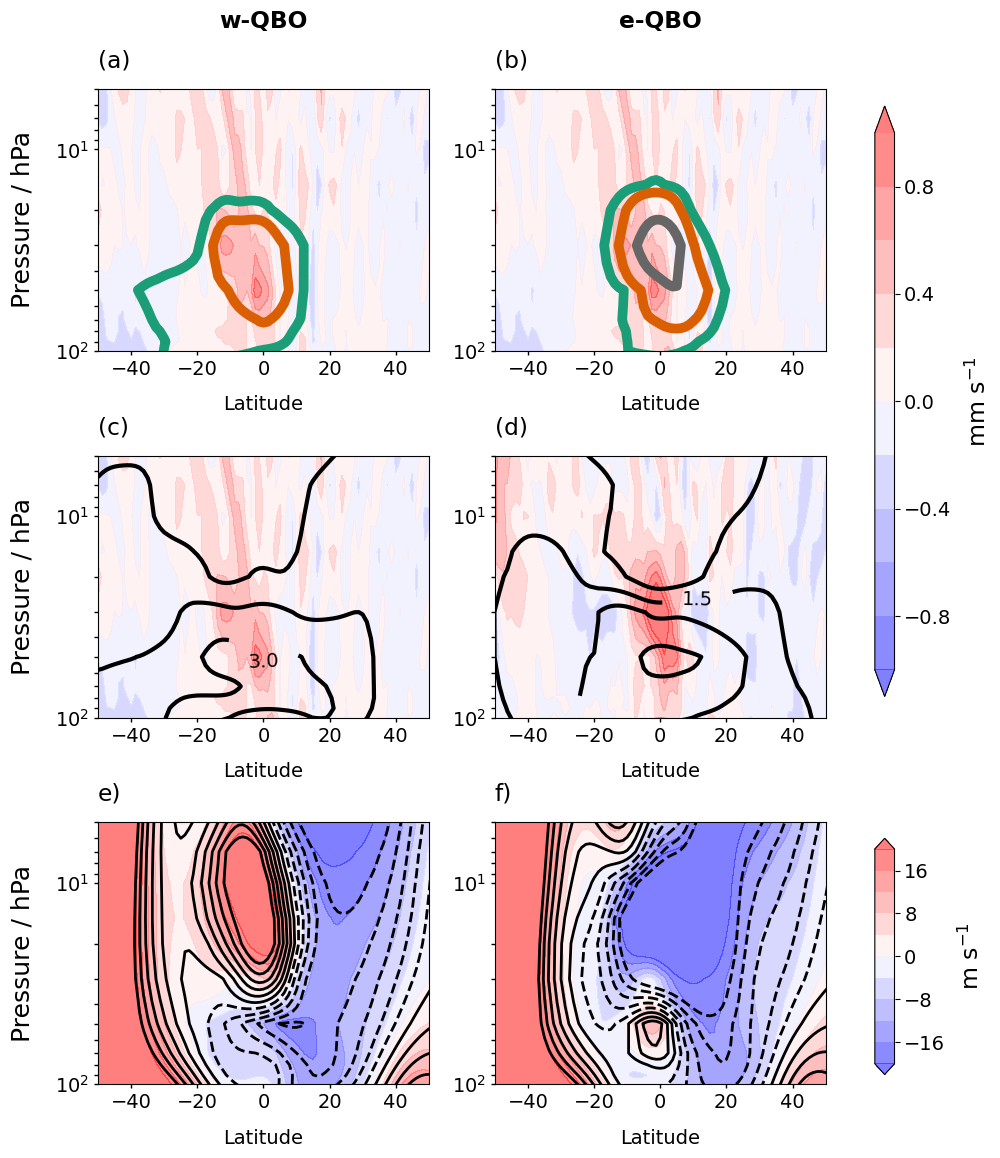

In [48]:
## Fig 9
y = zon_average[0].coord('pressure').points
x = zon_average[0].coord('latitude').points

cm = 1/2.54
fig, axs = plt.subplots(3,2, figsize = (25*cm,30*cm))

ax = axs.ravel()

    #w* and T w-QBO
t_data = T_alt[1][2].data
tmp = ax[2].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[2].clabel(tmp, fontsize = 14, fmt = '%1.1f')

w = w_anomalies[1][2].data
cw = ax[2].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[2].set_title(letter_labels[2] ,  loc = 'left', y = 1.05)
ax[0].set_title('w-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and T e-QBO
t_data = T_alt[3][2].data
tmp = ax[3].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[3].clabel(tmp, fontsize = 14, fmt = '%1.1f')

w = w_anomalies[3][2].data
cw = ax[3].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[3].set_title(letter_labels[3],  loc = 'left', y = 1.05)
ax[1].set_title('e-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and SO4 w-QBO
SO4_data = SO4_alt[1][2]
cs = ax[0].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[1][2].data
cw = ax[0].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[0].set_title(letter_labels[0] ,  loc = 'left', y = 1.05)

    #w* and SO4 e-QBO
SO4_data = SO4_alt[3][2]
cs = ax[1].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[1][2].data
cw = ax[1].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[1].set_title(letter_labels[1],  loc = 'left', y = 1.05)

# aerosol and QBO and QBO'

zon = zon_average[1][2].data
cz = ax[4].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[1][2].data
czc = ax[4].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')

ax[4].set_title(letter_labels[4] ,  loc = 'left', y = 1.05)
#ax[2].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

# aerosol and QBO and QBO'

zon = zon_average[3][2].data
cz = ax[5].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[3][2].data
czc = ax[5].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')


ax[5].set_title(letter_labels[5] ,  loc = 'left', y = 1.05)
#ax[3].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

ax[2].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[0].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[4].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)

#ax[2].set_ylabel('zonal wind and SO$_4$ anomalies', fontsize = 30, labelpad = 32)
#ax[0].set_ylabel('\overline{w}* anomalies and T anomalies', fontsize = 30, labelpad = 32)

for i in range(0,6):
        ax[i].set_xlim(-50,50)
        ax[i].set_ylim(100,5)
        ax[i].set_yscale('log')
        ax[i].set_xlabel('Latitude', labelpad = 12)
        ax[i].yaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3, which = 'both') 
        ax[i].xaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3) 
    
cbar_ax = fig.add_axes([0.90, 0.4, 0.02, 0.5])
colourbar = plt.colorbar(cw, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('mm s$^{-1}$', fontsize = 17, labelpad = 10)
colourbar.ax.set_xticklabels(colourbar.ax.get_xticklabels(), rotation='vertical')


cbar_ax = fig.add_axes([0.90, 0.08, 0.02, 0.2])
colourbar = plt.colorbar(cz, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('m s$^{-1}$', fontsize = 17, labelpad = 10)

plt.tight_layout() 
plt.subplots_adjust( hspace = 0.4, wspace = 0.2, right = 0.85)

plt.savefig('Fig09.png', dpi = 500)

/tmp/ipykernel_1611866/1844851707.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


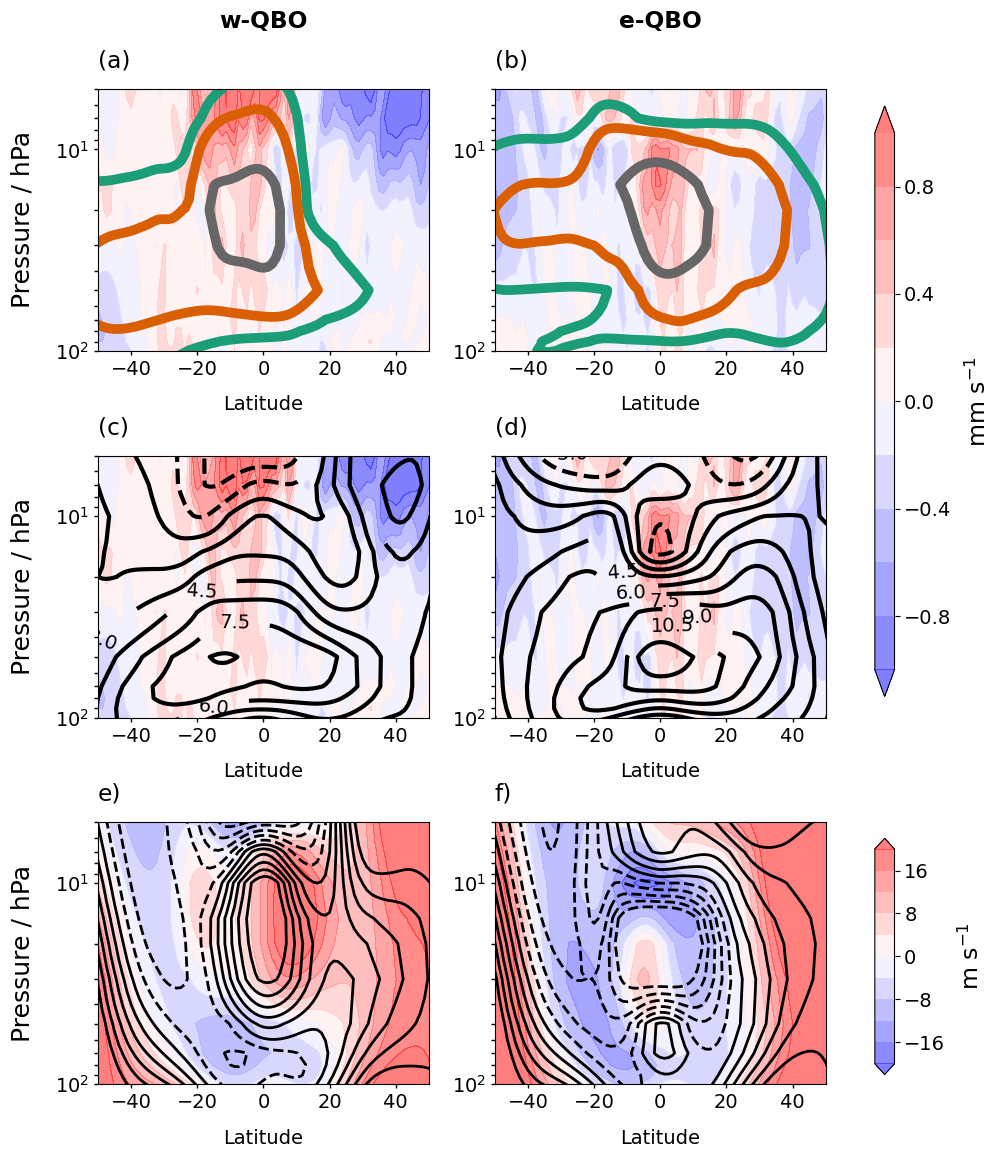

In [49]:
## Fig 10
y = zon_average[0].coord('pressure').points
x = zon_average[0].coord('latitude').points

cm = 1/2.54
fig, axs = plt.subplots(3,2, figsize = (25*cm,30*cm))

ax = axs.ravel()

    #w* and T w-QBO
t_data = T_alt[1][5].data
tmp = ax[2].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[2].clabel(tmp, fontsize = 14, fmt = '%1.1f')

w = w_anomalies[1][5].data
cw = ax[2].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[2].set_title(letter_labels[2] ,  loc = 'left', y = 1.05)
ax[0].set_title('w-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and T e-QBO
t_data = T_alt[3][5].data
tmp = ax[3].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[3].clabel(tmp, fontsize = 14, fmt = '%1.1f')

w = w_anomalies[3][5].data
cw = ax[3].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[3].set_title(letter_labels[3],  loc = 'left', y = 1.05)
ax[1].set_title('e-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and SO4 w-QBO
SO4_data = SO4_alt[1][5]
cs = ax[0].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[1][5].data
cw = ax[0].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[0].set_title(letter_labels[0] ,  loc = 'left', y = 1.05)

    #w* and SO4 e-QBO
SO4_data = SO4_alt[3][5]
cs = ax[1].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[3][5].data
cw = ax[1].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[1].set_title(letter_labels[1],  loc = 'left', y = 1.05)

# aerosol and QBO and QBO'

zon = zon_average[1][5].data
cz = ax[4].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[1][5].data
czc = ax[4].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')

ax[4].set_title(letter_labels[4] ,  loc = 'left', y = 1.05)
#ax[2].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

# aerosol and QBO and QBO'

zon = zon_average[3][5].data
cz = ax[5].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[3][5].data
czc = ax[5].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')


ax[5].set_title(letter_labels[5] ,  loc = 'left', y = 1.05)
#ax[3].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

ax[2].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[0].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[4].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)

#ax[2].set_ylabel('zonal wind and SO$_4$ anomalies', fontsize = 30, labelpad = 32)
#ax[0].set_ylabel('\overline{w}* anomalies and T anomalies', fontsize = 30, labelpad = 32)

for i in range(0,6):
        ax[i].set_xlim(-50,50)
        ax[i].set_ylim(100,5)
        ax[i].set_yscale('log')
        ax[i].set_xlabel('Latitude', labelpad = 12)
        ax[i].yaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3, which = 'both') 
        ax[i].xaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3) 
    
cbar_ax = fig.add_axes([0.90, 0.4, 0.02, 0.5])
colourbar = plt.colorbar(cw, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('mm s$^{-1}$', fontsize = 17, labelpad = 10)
colourbar.ax.set_xticklabels(colourbar.ax.get_xticklabels(), rotation='vertical')


cbar_ax = fig.add_axes([0.90, 0.08, 0.02, 0.2])
colourbar = plt.colorbar(cz, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('m s$^{-1}$', fontsize = 17, labelpad = 10)

plt.tight_layout() 
plt.subplots_adjust( hspace = 0.4, wspace = 0.2, right = 0.85)


plt.savefig('Fig10.png', dpi = 500)

<ipython-input-84-704d091742ee>:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


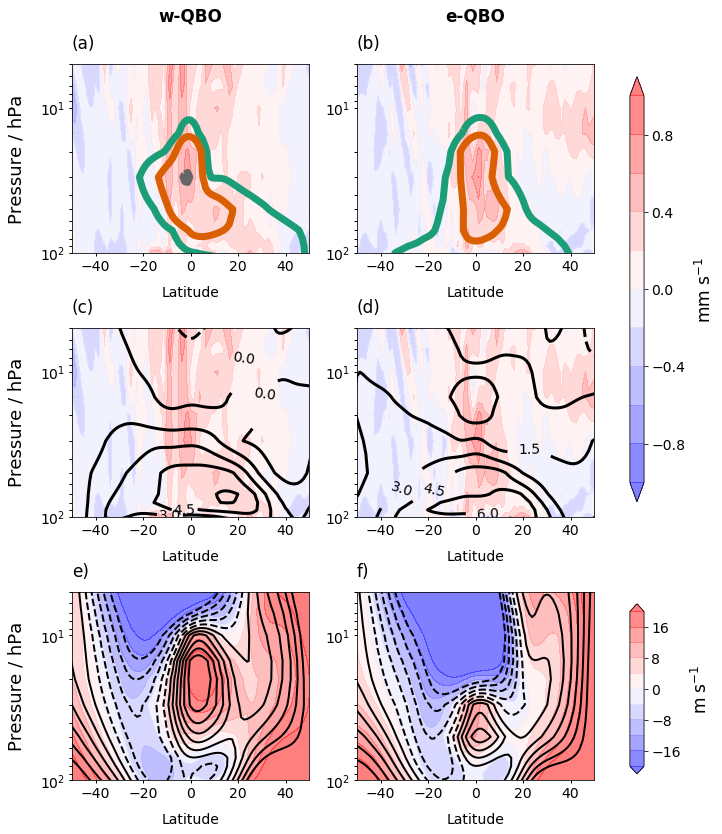

In [84]:
## Fig. S4
y = zon_average[0].coord('pressure').points
x = zon_average[0].coord('latitude').points

cm = 1/2.54
fig, axs = plt.subplots(3,2, figsize = (25*cm,30*cm))

ax = axs.ravel()

    #w* and T w-QBO
t_data = T_alt[0][2].data
tmp = ax[2].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
cb = ax[2].clabel(tmp, fontsize = 14, fmt = '%1.1f', inline_spacing=-5)
#[txt.set_bbox(dict(boxstyle='square,pad=0')) for txt in cb]

w = w_anomalies[0][2].data
cw = ax[2].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[2].set_title(letter_labels[2] ,  loc = 'left', y = 1.05)
ax[0].set_title('w-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and T e-QBO
t_data = T_alt[2][2].data
tmp = ax[3].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[3].clabel(tmp, fontsize = 14, fmt = '%1.1f', inline_spacing=0.1)

w = w_anomalies[2][2].data
cw = ax[3].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[3].set_title(letter_labels[3],  loc = 'left', y = 1.05)
ax[1].set_title('e-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and SO4 w-QBO
SO4_data = SO4_alt[0][2]
cs = ax[0].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[0][2].data
cw = ax[0].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[0].set_title(letter_labels[0] ,  loc = 'left', y = 1.05)

    #w* and SO4 e-QBO
SO4_data = SO4_alt[2][2]
cs = ax[1].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[2][2].data
cw = ax[1].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[1].set_title(letter_labels[1],  loc = 'left', y = 1.05)

# aerosol and QBO and QBO'

zon = zon_average[0][2].data
cz = ax[4].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[0][2].data
czc = ax[4].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')

ax[4].set_title(letter_labels[4] ,  loc = 'left', y = 1.05)
#ax[2].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

# aerosol and QBO and QBO'

zon = zon_average[2][2].data
cz = ax[5].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[2][2].data
czc = ax[5].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')


ax[5].set_title(letter_labels[5] ,  loc = 'left', y = 1.05)
#ax[3].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

ax[2].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[0].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[4].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)

#ax[2].set_ylabel('zonal wind and SO$_4$ anomalies', fontsize = 30, labelpad = 32)
#ax[0].set_ylabel('\overline{w}* anomalies and T anomalies', fontsize = 30, labelpad = 32)

for i in range(0,6):
        ax[i].set_xlim(-50,50)
        ax[i].set_ylim(100,5)
        ax[i].set_yscale('log')
        ax[i].set_xlabel('Latitude', labelpad = 12)
        ax[i].yaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3, which = 'both') 
        ax[i].xaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3) 
    
cbar_ax = fig.add_axes([0.90, 0.4, 0.02, 0.5])
colourbar = plt.colorbar(cw, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('mm s$^{-1}$', fontsize = 17, labelpad = 10)
colourbar.ax.set_xticklabels(colourbar.ax.get_xticklabels(), rotation='vertical')


cbar_ax = fig.add_axes([0.90, 0.08, 0.02, 0.2])
colourbar = plt.colorbar(cz, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('m s$^{-1}$', fontsize = 17, labelpad = 10)

plt.tight_layout() 
plt.subplots_adjust( hspace = 0.4, wspace = 0.2, right = 0.85)

plt.savefig('FigS4.png', dpi = 500)

/tmp/ipykernel_1611866/4290846044.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


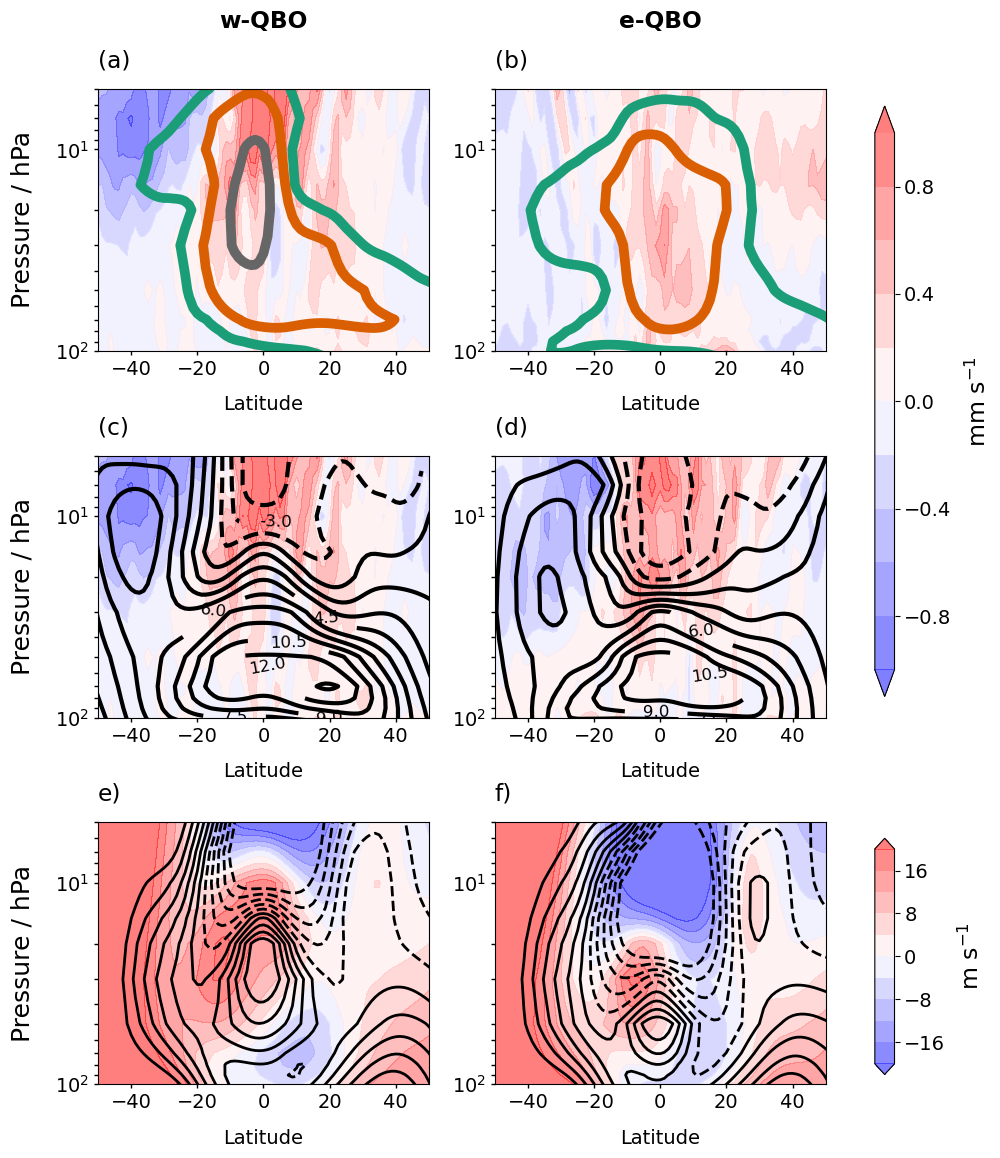

In [51]:
## Fig. S3
y = zon_average[0].coord('pressure').points
x = zon_average[0].coord('latitude').points

cm = 1/2.54
fig, axs = plt.subplots(3,2, figsize = (25*cm,30*cm))

ax = axs.ravel()

    #w* and T w-QBO
t_data = T_alt[0][5].data
tmp = ax[2].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[2].clabel(tmp, fontsize = 12, fmt = '%1.1f')

w = w_anomalies[0][5].data
cw = ax[2].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[2].set_title(letter_labels[2] ,  loc = 'left', y = 1.05)
ax[0].set_title('w-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and T e-QBO
t_data = T_alt[2][5].data
tmp = ax[3].contour(x, y, t_data, T_levels, linewidths = 3, colors = 'black')
ax[3].clabel(tmp, fontsize = 12, fmt = '%1.1f')

w = w_anomalies[2][5].data
cw = ax[3].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[3].set_title(letter_labels[3],  loc = 'left', y = 1.05)
ax[1].set_title('e-QBO', fontweight = 'bold', loc = 'center', y = 1.2)

    #w* and SO4 w-QBO
SO4_data = SO4_alt[0][5]
cs = ax[0].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[0][5].data
cw = ax[0].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[0].set_title(letter_labels[0] ,  loc = 'left', y = 1.05)

    #w* and SO4 e-QBO
SO4_data = SO4_alt[2][5]
cs = ax[1].contour(x, y, SO4_data, SO4_level, linewidths = 7, cmap = plt.cm.Dark2)

w = w_anomalies[2][2].data
cw = ax[1].contourf(x, y, w*1000, w_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)

ax[1].set_title(letter_labels[1],  loc = 'left', y = 1.05)

# aerosol and QBO and QBO'

zon = zon_average[0][5].data
cz = ax[4].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[0][5].data
czc = ax[4].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')

ax[4].set_title(letter_labels[4] ,  loc = 'left', y = 1.05)
#ax[2].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

# aerosol and QBO and QBO'

zon = zon_average[2][5].data
cz = ax[5].contourf(x, y, zon, wind_levels, extend = 'both', cmap = plt.cm.bwr, alpha = 0.5)
    
zonc = zonc_avg[2][5].data
czc = ax[5].contour(x, y, zonc, wind_levels, linewidths = 2, colors = 'black')


ax[5].set_title(letter_labels[5] ,  loc = 'left', y = 1.05)
#ax[3].set_title('zonal wind and SO$_4$ anomalies', fontweight = 'bold', loc = 'center', y = 1.2)

ax[2].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[0].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)
ax[4].set_ylabel('Pressure / hPa', fontsize = 18, labelpad = 15)

#ax[2].set_ylabel('zonal wind and SO$_4$ anomalies', fontsize = 30, labelpad = 32)
#ax[0].set_ylabel('\overline{w}* anomalies and T anomalies', fontsize = 30, labelpad = 32)

for i in range(0,6):
        ax[i].set_xlim(-50,50)
        ax[i].set_ylim(100,5)
        ax[i].set_yscale('log')
        ax[i].set_xlabel('Latitude', labelpad = 12)
        ax[i].yaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3, which = 'both') 
        ax[i].xaxis.set_tick_params(width=1, labelsize = 14, direction = 'out', length = 3) 
    
cbar_ax = fig.add_axes([0.90, 0.4, 0.02, 0.5])
colourbar = plt.colorbar(cw, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('mm s$^{-1}$', fontsize = 17, labelpad = 10)
colourbar.ax.set_xticklabels(colourbar.ax.get_xticklabels(), rotation='vertical')


cbar_ax = fig.add_axes([0.90, 0.08, 0.02, 0.2])
colourbar = plt.colorbar(cz, cax = cbar_ax , orientation = 'vertical')
colourbar.set_label('m s$^{-1}$', fontsize = 17, labelpad = 10)

plt.tight_layout() 
plt.subplots_adjust( hspace = 0.4, wspace = 0.2, right = 0.85)

plt.savefig('FigS3.png', dpi = 500)